In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns

In [2]:
main_df = pd.read_csv(r'data/main_df.csv')

incidence = main_df.loc[:, 'HIVincidence':'HIVincidence']

main_df_10 = main_df.loc[:, 'HIVincidence':'drugdeaths']
main_df_20 = main_df.loc[:, 'drugdep':'household_income']


main_df_20['HIVincidence'] = main_df['HIVincidence']
main_df_20['HIVincidence'] = main_df['HIVincidence']

#main_df_20i = main_df_20.merge(main_df_i, on='drugdeaths')

main_df_20.head()

,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,HIVincidence
0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304,10.9
1,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058,8.7
2,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145,0.0
3,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078,0.0
4,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934,10.4


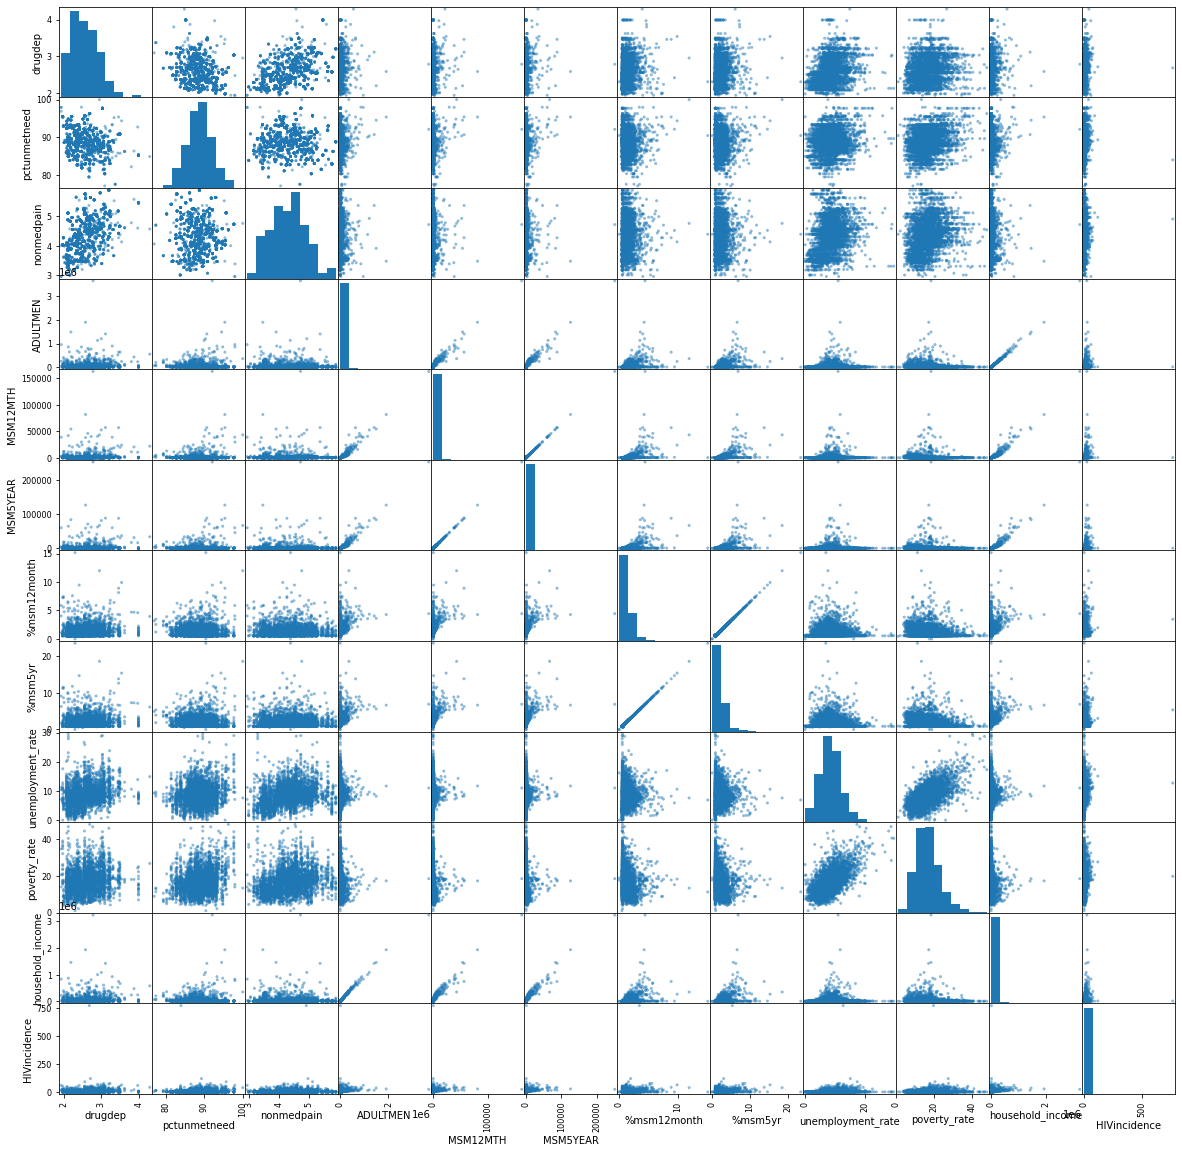

In [3]:
scatter = pd.plotting.scatter_matrix(main_df_20, figsize = (20,20))

In [4]:
#plt.savefig(r"scatter.png")

In [5]:
#Poverty rate


In [74]:
race_df = pd.read_csv(r'data/merged_w_race.csv')
race_df.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,total_black,total_white
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,19410,333,514,1.715611,2.648120,8.5,12.8,20304,20844,85548
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,69724,925,1429,1.326659,2.049509,8.6,13.8,73058,37852,355400
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,11567,82,127,0.708913,1.097951,14.2,24.1,9145,25168,26206
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,9508,119,184,1.251578,1.935212,10.9,17.0,7078,9920,34478
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,21368,601,928,2.812617,4.342943,9.3,17.3,20934,1880,110726


In [75]:
idx = race_df.HIVincidence.argmax()
scott = race_df.iloc[idx, :]

included_race = race_df.copy()
included_race.drop(idx, inplace = True)

included_race['AA Population'] = (included_race['total_black'] / included_race['Population'])*100
included_race

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,total_black,total_white,AA Population
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,333,514,1.715611,2.648120,8.5,12.8,20304,20844,85548,37.874080
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,925,1429,1.326659,2.049509,8.6,13.8,73058,37852,355400,18.583141
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,82,127,0.708913,1.097951,14.2,24.1,9145,25168,26206,95.805101
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,119,184,1.251578,1.935212,10.9,17.0,7078,9920,34478,43.969682
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,601,928,2.812617,4.342943,9.3,17.3,20934,1880,110726,3.259588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,...,177,274,1.044803,1.617378,5.6,12.2,16687,1218,84404,2.725259
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,...,50,78,0.545137,0.850414,3.6,8.5,7873,304,44042,1.317557
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,...,75,116,1.013377,1.567356,5.8,14.2,7557,320,39798,1.537057
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,...,17,27,0.541229,0.859599,7.9,14.2,3461,92,15800,1.103912


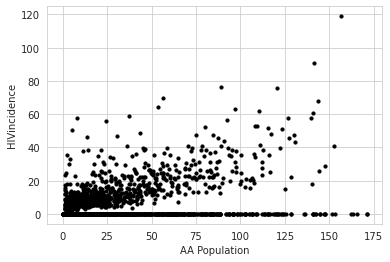

In [76]:
y1 = included_race['HIVincidence']
x1 = included_race['AA Population']

fig, ax = plt.subplots()
ax.scatter(x1,y1, color='k', s=10)
ax.set_xlabel('AA Population')
ax.set_ylabel('HIVincidence');

In [77]:
included_race_nozeros = included_race[included_race['HIVincidence']>0]
included_race_nozeros

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,total_black,total_white,AA Population
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,333,514,1.715611,2.648120,8.5,12.8,20304,20844,85548,37.874080
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,925,1429,1.326659,2.049509,8.6,13.8,73058,37852,355400,18.583141
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,601,928,2.812617,4.342943,9.3,17.3,20934,1880,110726,3.259588
5,1011,Bullock County,AL,2015,0.0,8.0,90.7,691.4,0.0,0.0,...,73,113,1.587992,2.458125,17.4,20.5,3746,14754,5524,141.119082
7,1015,Calhoun County,AL,2015,0.0,10.0,10.3,211.2,5.0,0.0,...,692,1070,1.608629,2.487331,13.5,21.7,45348,48554,174390,42.116494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,55079,Milwaukee County,WI,2015,0.0,120.0,15.3,357.8,57.0,0.0,...,11921,18428,3.512571,5.429886,10.5,21.9,381446,520996,1242322,54.479596
3089,55087,Outagamie County,WI,2015,0.0,5.0,3.3,61.2,11.0,0.0,...,817,1263,1.236923,1.912159,4.8,8.9,70144,4628,336572,2.525319
3096,55101,Racine County,WI,2015,0.0,8.0,4.9,125.1,11.0,0.0,...,697,1078,0.965775,1.493695,9.4,13.3,75078,45822,327344,23.508468
3098,55105,Rock County,WI,2015,0.0,8.0,6.0,100.5,18.0,0.0,...,1141,1764,1.944809,3.006699,9.4,14.9,63385,16462,292994,10.203677


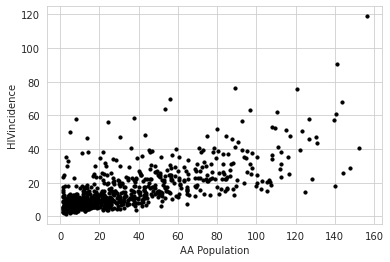

In [78]:
y2 = included_race_nozeros['HIVincidence']
x2 = included_race_nozeros['AA Population']

fig, ax = plt.subplots()
ax.scatter(x2,y2, color='k', s=10)
ax.set_xlabel('AA Population')
ax.set_ylabel('HIVincidence');

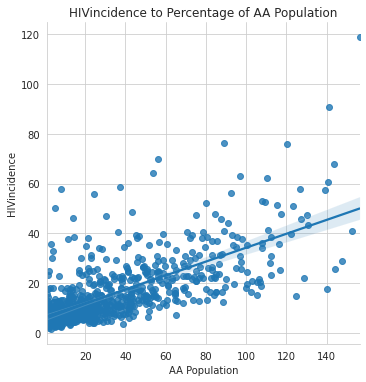

In [81]:
sns.set_style('whitegrid')
sns.lmplot(y ='HIVincidence', x ='AA Population', data = included_race_nozeros).set(title='HIVincidence to Percentage of AA Population')


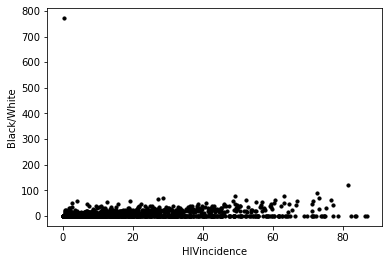

In [58]:
raceblack_df = included_race
raceblack_df['Black/White'] = (raceblack_df['total_black'] / (raceblack_df['total_black']+raceblack_df['total_white']) )*100

y2 = raceblack_df['HIVincidence']
x2 = raceblack_df['Black/White']

fig, ax = plt.subplots()
ax.scatter(x2,y2, color='k', s=10)
ax.set_xlabel('HIVincidence')
ax.set_ylabel('Black/White');

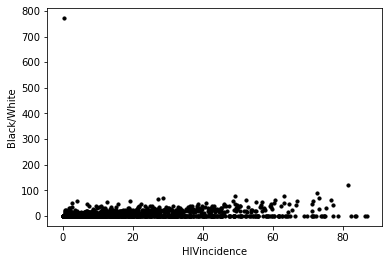

In [59]:
racewhite_df = raceblack_df

racewhite_df = racewhite_df[(racewhite_df['Black/White']<200)]

y2 = racewhite_df['HIVincidence']
x2 = racewhite_df['Black/White']

fig, ax = plt.subplots()
ax.scatter(x2,y2, color='k', s=10)
ax.set_xlabel('HIVincidence')
ax.set_ylabel('Black/White');

In [62]:
included_race.sort_values(by=['Black/Pop%'], ascending=False)


,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,total_black,total_white,Black/Pop%,Black/White
1431,28063,Jefferson County,MS,2015,0.0,0.0,0.0,433.1,1.0,0.0,...,24,0.562786,0.844179,17.3,47.9,2553,12810,2048,171.050875,86.216180
1410,28021,Claiborne County,MS,2015,0.0,0.0,0.0,349.1,1.0,0.0,...,140,2.699496,4.153070,17.7,36.4,3163,15678,2372,170.951914,86.858726
1425,28051,Holmes County,MS,2015,0.0,0.0,0.0,474.0,1.0,0.0,...,52,0.553385,0.846354,20.0,43.9,6396,30380,5908,165.504467,83.719136
43,1087,Macon County,AL,2015,0.0,0.0,0.0,438.7,1.0,0.0,...,64,0.548789,0.856646,18.8,26.4,8039,31418,6200,163.507676,83.518528
31,1063,Greene County,AL,2015,0.0,0.0,0.0,396.7,1.0,0.0,...,27,0.541057,0.859325,25.9,36.6,3282,13722,2964,162.390533,82.236606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,31183,Wheeler County,NE,2015,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0.544959,0.817439,3.1,13.1,388,0,1484,0.000000,0.000000
1704,31103,Keya Paha County,NE,2015,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0.673401,1.010101,0.2,15.3,375,0,1580,0.000000,0.000000
1631,30069,Petroleum County,MT,2015,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.460829,0.921659,5.9,10.9,220,0,928,0.000000,0.000000
2655,48269,King County,TX,2015,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.636943,0.636943,4.8,7.2,127,0,546,0.000000,0.000000


In [ ]:
result = sm.ols(formula="HIVincidence ~ household_income + Black/Pop%", data=included_race).fit()
print(result.params)

In [89]:
included_race['log_income'] = np.log(included_race['household_income'])

ym = included_race['HIVincidence']
xm = sm.add_constant(included_race[['HIVprevalence', 'pctunins', 'log_income', 'AA Population']])
xm.head()

#Using statsmodels again but we could calculate this agian using the matrix equation for OLS
model = sm.OLS(ym, xm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     767.3
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        17:55:28   Log-Likelihood:                -10394.
No. Observations:                3139   AIC:                         2.080e+04
Df Residuals:                    3134   BIC:                         2.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -15.2585      0.949    -16.083      0.000     -17.119     -13.398
HIVprevalence     0.0240      0.001     28.332      0.000       0.022       0.026
pctunins          0.0941      0.023      4.070      0.000       0.049       0.139
log_income        1.4700      0.092     16.061      0.000       1.291       1.649
AA Population     0.0343      0.005      6.306      0.000       0.024       0.045
==============================================================================
Omnibus:                     2123.944   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74941.063
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      26.310   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
included_race['log_income'] = np.log(included_race['household_income'])

ym = included_race['HIVincidence']
xm = sm.add_constant(included_race[['HIVprevalence', 'AA Population']])
xm.head()

#Using statsmodels again but we could calculate this agian using the matrix equation for OLS
model = sm.OLS(ym, xm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1299.
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        17:53:30   Log-Likelihood:                -10518.
No. Observations:                3139   AIC:                         2.104e+04
Df Residuals:                    3136   BIC:                         2.106e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9052      0.155     -5.837      0.000      -1.209      -0.601
HIVprevalence     0.0291      0.001     35.783      0.000       0.028       0.031
AA Population     0.0259      0.006      4.660      0.000       0.015       0.037
==============================================================================
Omnibus:                     1667.956   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46578.177
Skew:                           1.966   Prob(JB):                         0.00
Kurtosis:                      21.457   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""